In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Crear carpeta "gráficos" si no existe
os.makedirs("gráficos", exist_ok=True)

# Leer CSV
df = pd.read_csv("kll_vs_sort_comparison.csv")

# ---- GRÁFICO TIEMPO ----
plt.figure()
plt.plot(df["num_bins"], df["kll_time_sec"], marker="o", label="KLL")
plt.plot(df["num_bins"], df["sort_time_sec"], marker="o", label="Sort")
plt.xlabel("Número de bins")
plt.ylabel("Tiempo (segundos)")
plt.title("Tiempo: KLL vs Sort")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig("gráficos/tiempo_kll_vs_sort.png")
plt.close()

# ---- GRÁFICO MEMORIA ----
plt.figure()
plt.plot(df["num_bins"], df["kll_memory_bytes"] / (1024 * 1024),
         marker="o", label="KLL")
plt.plot(df["num_bins"], df["sort_memory_bytes"] / (1024 * 1024),
         marker="o", label="Sort")
plt.xlabel("Número de bins")
plt.ylabel("Memoria (MB)")
plt.title("Memoria: KLL vs Sort")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.savefig("gráficos/memoria_kll_vs_sort.png")
plt.close()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("bin_experiment.csv")

# Métricas derivadas
df["iqr"] = df["p75"] - df["p25"]
df["iqr_per_sec"] = df["iqr"] / df["kll_time_sec"]

optimal_bin = 1000  # decisión fundamentada

# --- 1) Dispersión (señal CNV) ---
plt.figure(figsize=(7,5))
plt.plot(df["bin_size"], df["iqr"], marker="o")
plt.axvline(optimal_bin, linestyle="--", label="1000 bp (óptimo)")
plt.xscale("log")
plt.xlabel("Bin size (bp)")
plt.ylabel("IQR de cobertura")
plt.title("Dispersión de cobertura (señal estructural)")
plt.legend()
plt.tight_layout()
plt.savefig("gráficos/dispersion.png")
plt.close()

# --- 2) Incremento marginal de IQR ---
plt.figure(figsize=(7,5))
plt.plot(df["bin_size"], df["iqr"].diff(), marker="o")
plt.axvline(optimal_bin, linestyle="--")
plt.xscale("log")
plt.xlabel("Bin size (bp)")
plt.ylabel("Δ IQR")
plt.title("Ganancia marginal de dispersión")

plt.tight_layout()
plt.savefig("gráficos/incremento.png")
plt.close()

# --- 3) Tiempo KLL ---
plt.figure(figsize=(7,5))
plt.plot(df["bin_size"], df["kll_time_sec"], marker="o")
plt.axvline(optimal_bin, linestyle="--")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Bin size (bp)")
plt.ylabel("Tiempo KLL (s)")
plt.title("Costo computacional del KLL")

plt.tight_layout()
plt.savefig("gráficos/tiempo.png")
plt.close()

# --- 4) Memoria KLL ---
plt.figure(figsize=(7,5))
plt.plot(df["bin_size"], df["kll_memory_bytes"], marker="o")
plt.axvline(optimal_bin, linestyle="--")
plt.xscale("log")
plt.xlabel("Bin size (bp)")
plt.ylabel("Memoria (bytes)")
plt.title("Uso de memoria del KLL")

plt.tight_layout()
plt.savefig("gráficos/memoria.png")
plt.close()

# --- 5) Señal / costo ---
plt.figure(figsize=(7,5))
plt.plot(df["bin_size"], df["iqr_per_sec"], marker="o")
plt.axvline(optimal_bin, linestyle="--", label="1000 bp (óptimo)")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Bin size (bp)")
plt.ylabel("IQR / tiempo")
plt.title("Eficiencia señal / costo")
plt.legend()

plt.tight_layout()
plt.savefig("gráficos/eficiencia.png")
plt.close()

# --- 6) Panel explicativo ---
plt.figure(figsize=(7,5))
plt.axis("off")
plt.text(
    0.05, 0.75,
    "¿Por qué 1000 bp?\n\n"
    "✔ Dispersión suficiente para CNVs\n"
    "✔ No mezcla regiones heterogéneas\n"
    "✔ Tiempo KLL ya estabilizado\n"
    "✔ Memoria KLL ya estable\n"
    "✔ Mayor resolución que bins grandes\n\n"
    "Bins mayores:\n"
    "• Aumentan IQR\n"
    "• Pierden resolución\n"
    "• No reducen costo",
    fontsize=12
)
plt.tight_layout()
plt.savefig("gráficos/explicacion.png")
plt.close()


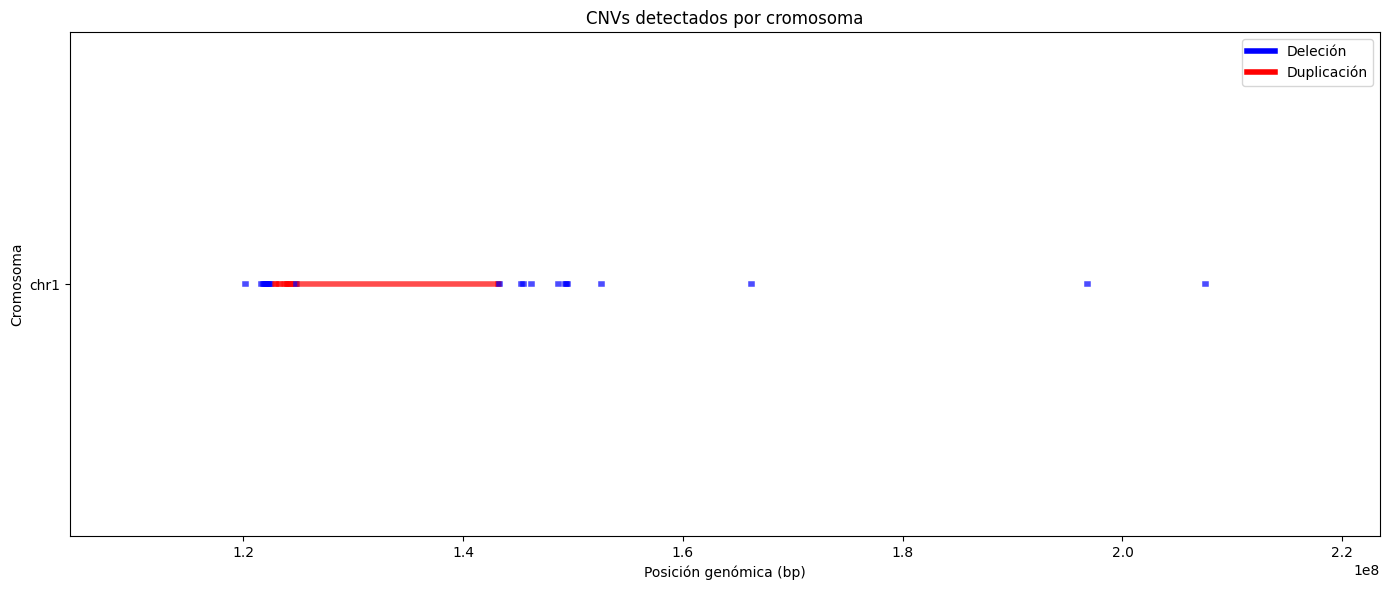

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Cargar CNVs
# =========================
df = pd.read_csv("cnv_detection.csv")

# Asegurar orden cromosómico
df["chr_num"] = df["chr"].str.replace("chr", "").astype(int)
df = df.sort_values(["chr_num", "start"])

chromosomes = df["chr"].unique()

# Mapeo cromosoma → eje Y
chr_to_y = {c: i for i, c in enumerate(chromosomes)}

# =========================
# Plot
# =========================
plt.figure(figsize=(14, 6))

for _, row in df.iterrows():
    y = chr_to_y[row["chr"]]
    color = "blue" if row["type"] == "DEL" else "red"

    plt.plot(
        [row["start"], row["end"]],
        [y, y],
        linewidth=4,
        color=color,
        alpha=0.7
    )

# =========================
# Estética
# =========================
plt.yticks(range(len(chromosomes)), chromosomes)
plt.xlabel("Posición genómica (bp)")
plt.ylabel("Cromosoma")
plt.title("CNVs detectados por cromosoma")

# Leyenda manual
plt.plot([], [], color="blue", linewidth=4, label="Deleción")
plt.plot([], [], color="red", linewidth=4, label="Duplicación")
plt.legend()

plt.tight_layout()
plt.savefig("gráficos/cnv_detectados.png")
plt.show()


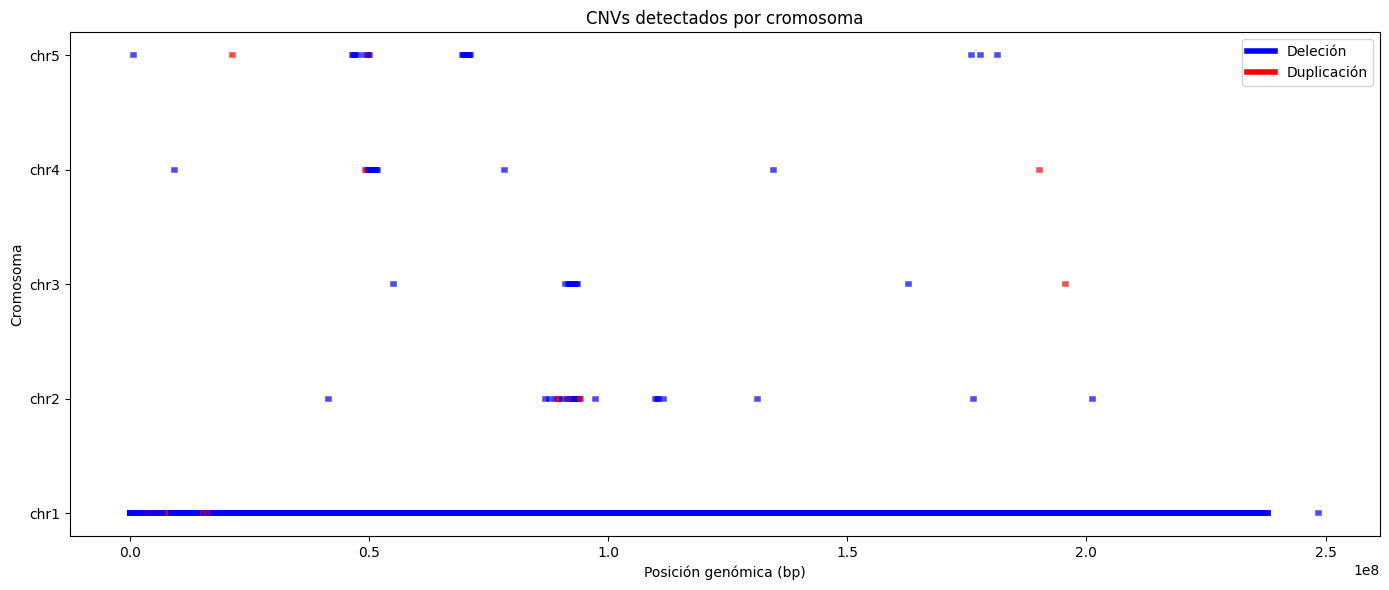

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Cargar CNVs
# =========================
df = pd.read_csv("cnv_detection_prueba.csv")

# Asegurar orden cromosómico
df["chr_num"] = df["chr"].str.replace("chr", "").astype(int)
df = df.sort_values(["chr_num", "start"])

chromosomes = df["chr"].unique()

# Mapeo cromosoma → eje Y
chr_to_y = {c: i for i, c in enumerate(chromosomes)}

# =========================
# Plot
# =========================
plt.figure(figsize=(14, 6))

for _, row in df.iterrows():
    y = chr_to_y[row["chr"]]
    color = "blue" if row["type"] == "DEL" else "red"

    plt.plot(
        [row["start"], row["end"]],
        [y, y],
        linewidth=4,
        color=color,
        alpha=0.7
    )

# =========================
# Estética
# =========================
plt.yticks(range(len(chromosomes)), chromosomes)
plt.xlabel("Posición genómica (bp)")
plt.ylabel("Cromosoma")
plt.title("CNVs detectados por cromosoma")

# Leyenda manual
plt.plot([], [], color="blue", linewidth=4, label="Deleción")
plt.plot([], [], color="red", linewidth=4, label="Duplicación")
plt.legend()

plt.tight_layout()
plt.savefig("gráficos/cnv_detectados1-5.png")
plt.show()


In [5]:
import pandas as pd

# ===============================
# Cargar CNVs
# ===============================
csv_file = "cnv_detection_prueba.csv"   # tu archivo
df = pd.read_csv(csv_file)

def count_cnvs(df, min_bins):
    f = df[df["num_bins"] >= min_bins]

    del_count = (f["type"] == "DEL").sum()
    dup_count = (f["type"] == "DUP").sum()

    return {
        "min_bins": min_bins,
        "DEL": del_count,
        "DUP": dup_count,
        "TOTAL": del_count + dup_count
    }

# ===============================
# Comparación
# ===============================
results = [
    count_cnvs(df, min_bins=1),
    count_cnvs(df, min_bins=5)
]

out = pd.DataFrame(results)
print(out)


   min_bins    DEL   DUP  TOTAL
0         1  14070  2378  16448
1         5    185   109    294


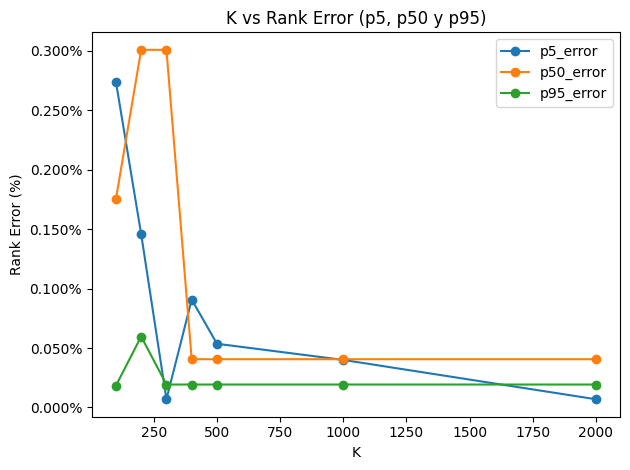

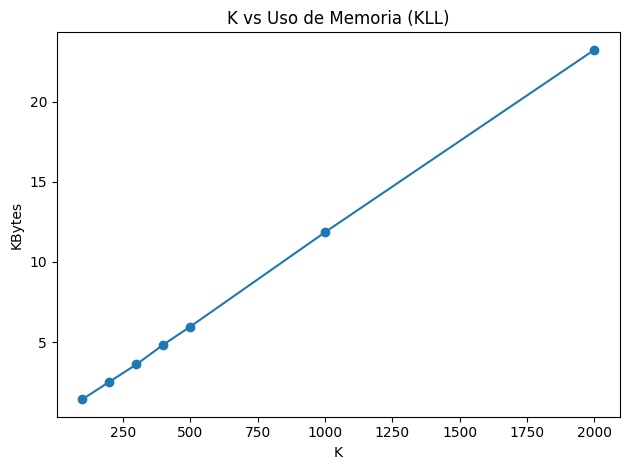

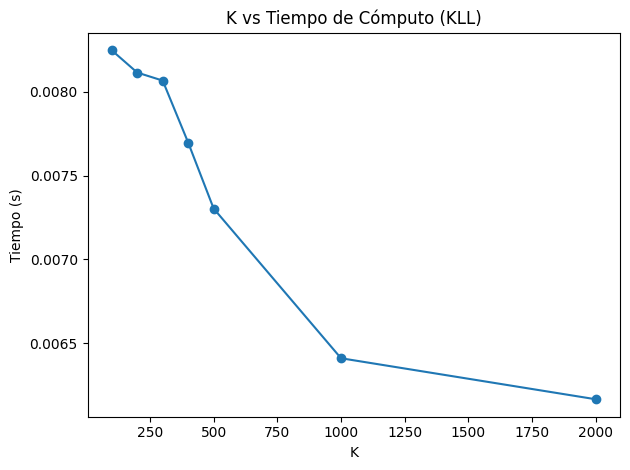

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.read_csv("k_experiment.csv")

# ---- Plot 1: K vs Rank Error (p5, p50, p95) ----
plt.figure()
plt.plot(df["K"], df["p5_rank_error"] * 100, marker='o', label="p5_error")
plt.plot(df["K"], df["p50_rank_error"] * 100, marker='o', label="p50_error")
plt.plot(df["K"], df["p95_rank_error"] * 100, marker='o', label="p95_error")
plt.xlabel("K")
plt.ylabel("Rank Error (%)")   # <-- ahora indica porcentaje
plt.title("K vs Rank Error (p5, p50 y p95)")
plt.legend()


# Formatear eje Y como porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.savefig("gráficos/K vs Rank error.png")
plt.show()

# ---- Plot 2: K vs Memory Usage ----
df["kll_bytes"] = df["kll_bytes"] / 1000  
plt.figure()
plt.plot(df["K"], df["kll_bytes"], marker='o')
plt.xlabel("K")
plt.ylabel("KBytes")
plt.title("K vs Uso de Memoria (KLL)")

plt.tight_layout()
plt.savefig("gráficos/k vs memoria kll.png")
plt.show()

# ---- Plot 3: K vs Time ----
plt.figure()
plt.plot(df["K"], df["kll_time_sec"], marker='o')
plt.xlabel("K")
plt.ylabel("Tiempo (s)")
plt.title("K vs Tiempo de Cómputo (KLL)")

plt.tight_layout()
plt.savefig("gráficos/k vs tiempo kll.png")
plt.show()


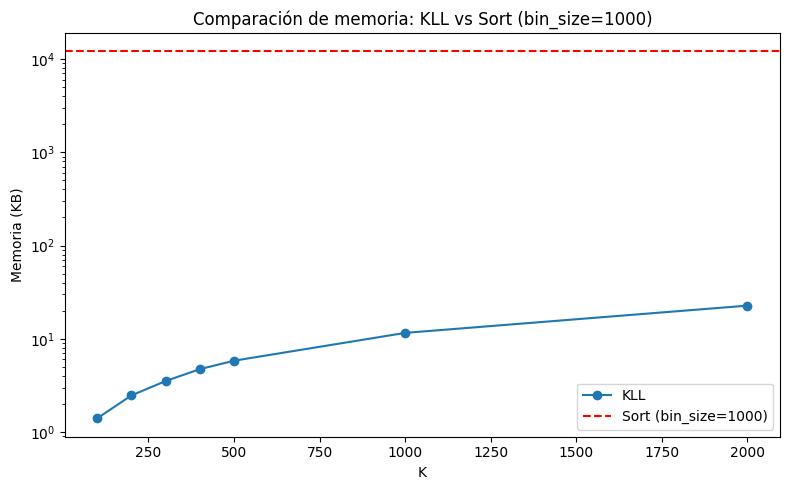

Memoria Sort (KB): 12137.71484375


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar ambos CSV
df_kll = pd.read_csv("k_experiment.csv")
df_comp = pd.read_csv("kll_vs_sort_comparison.csv")

# Filtrar solo bin_size=1000 para Sort
row_sort = df_comp[df_comp["bin_size"] == 1000].iloc[0]
sort_mem = row_sort["sort_memory_bytes"] / 1024  # KB

# Convertir KLL a KB
df_kll["kll_bytes"] = df_kll["kll_bytes"] / 1024

# Graficar
plt.figure(figsize=(8,5))
plt.plot(df_kll["K"], df_kll["kll_bytes"], marker="o", label="KLL")
plt.axhline(y=sort_mem, color="red", linestyle="--", label="Sort (bin_size=1000)")

plt.xlabel("K")
plt.ylabel("Memoria (KB)")
plt.yscale("log")
plt.title("Comparación de memoria: KLL vs Sort (bin_size=1000)")
plt.legend()
plt.tight_layout()
plt.savefig("gráficos/k memoria kll vs sort.png")
plt.show()

print("Memoria Sort (KB):", sort_mem)


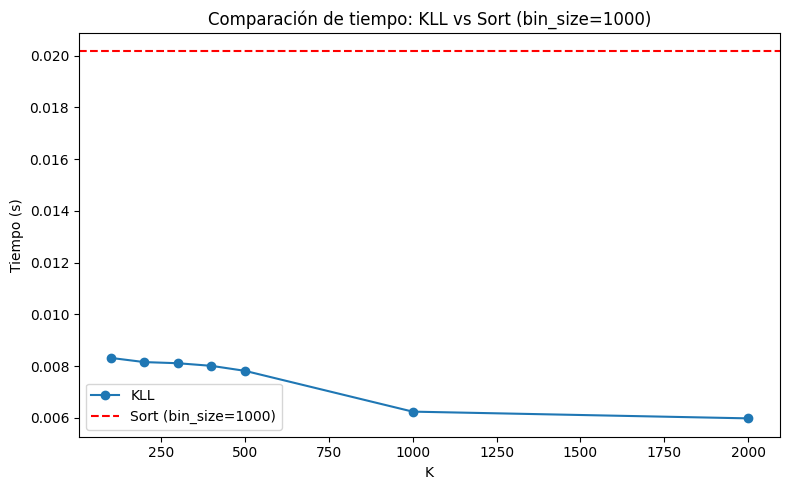

Tiempo Sort (s): 0.0201702


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar ambos CSV
df_kll = pd.read_csv("k_experiment.csv")
df_comp = pd.read_csv("kll_vs_sort_comparison.csv")

# Filtrar solo bin_size=1000 para Sort
row_sort = df_comp[df_comp["bin_size"] == 1000].iloc[0]
sort_time = row_sort["sort_time_sec"]

# Graficar
plt.figure(figsize=(8,5))
plt.plot(df_kll["K"], df_kll["kll_time_sec"], marker="o", label="KLL")
plt.axhline(y=sort_time, color="red", linestyle="--", label="Sort (bin_size=1000)")

plt.xlabel("K")
plt.ylabel("Tiempo (s)")
plt.title("Comparación de tiempo: KLL vs Sort (bin_size=1000)")
plt.legend()
plt.tight_layout()
plt.savefig("gráficos/k tiempo kll vs sort.png")
plt.show()

print("Tiempo Sort (s):", sort_time)
